In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


In [3]:
#hypothesis function: y = a + bx
def hypothesisFunction(theta,X):
    y = np.matmul(theta,X.T)
    return y


In [4]:
#gradient descent method
def gradientDescentMethod(learningRate,toleranceValue,theta,thetaOld,X,Y):
    #print("tolerance Value:",toleranceValue)
    #print("outside Norm:",np.linalg.norm(theta - thetaOld,ord = 2))
    while (np.linalg.norm(theta - thetaOld,ord = 2)) >= toleranceValue:
        thetaOld = theta
        theta = thetaOld - (learningRate/X.shape[0])*np.matmul((hypothesisFunction(theta,X)-Y.T),X)
        #print("Inside Norm:",np.linalg.norm(theta - thetaOld,ord = 2))
    return theta

In [5]:
#loading datasets
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
#before splitting the data, we need to split the dataset into two: target value and predictor values
#Y: Target value ( Boston housing price)
#X: Predictor value (All other features)

X = boston.data
Y = boston.target

In [7]:
#splitting the dataset
X_train, X_test, Y_trainLabel, Y_testLabel = train_test_split(X,Y,test_size= 0.33,random_state=5) 

X_train = np.insert(X_train,0,1,axis=1) #adding ones to add the bias term
X_test = np.insert(X_test,0,1,axis=1)  #adding ones to add the bias term


In [8]:

#initialisation of theta
theta = np.ones(X_train.shape[1])
thetaOld = float('inf')


In [23]:
#initialization of parameters for the gradientDescentMethod
learningRate = 0.0000001
toleranceValue = 0.0000001

In [24]:
#training
optimumTheta = gradientDescentMethod(learningRate,toleranceValue,theta,thetaOld,X_train,Y_trainLabel)
print (optimumTheta)

[ 1.31678365 -0.15137084  0.05673138 -0.04106035  1.03688093  1.13635885
  4.37519681  0.01277755 -0.62884057  0.20365144 -0.00968627 -0.21886681
  0.01957311 -0.50056291]


In [28]:
#testing classifier
prediction = hypothesisFunction(optimumTheta,X_test)

#training error
trainPrediction = hypothesisFunction(optimumTheta,X_train)

In [29]:
#mse error

mse = sklearn.metrics.mean_squared_error(Y_testLabel, prediction)
print("Test:",mse)

mse = sklearn.metrics.mean_squared_error(Y_trainLabel, trainPrediction)
print("train:",mse)

('Test:', 32.21887131191145)
('train:', 22.782737723028134)


|learning Rate|tolerance Value|time|MSE (train)|MSE(test)|
|:----:|:----:|:----:|:----:|:----:|
|0.000001|0.000001|0m21.767s| 22.78|32.22|
|0.0000001|0.000001|0m8.151|44.42|52.52|
|0.0000001|0.0000001|6m9.953|22.78|32.22|
|0.000001|0.0000001|1m5.795s|21.29|31.43|




	

The above table shows the different mean square error for both the training and the test set. We found that for learning rate = 0.000001 and tolerance Value = 0.0000001, we got the less mean square error for both the training and the test set. Following figure shows the graph for the predicted and true values:

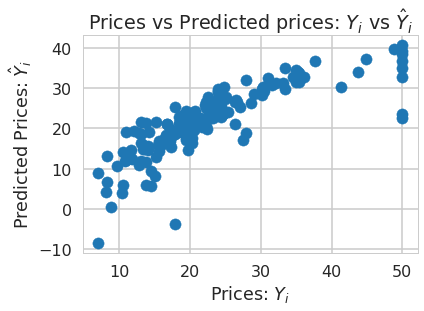

In [27]:
plt.scatter(Y_testLabel,prediction)
plt.xlabel("Prices: $Y_i$ ")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()